In [2]:
import pandas as pd
import datetime as dt
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
x = []
for year in years:
    x.append(pd.read_csv('../data/Turnstile/{}_turnstile_objectid_format.csv'.format(year)))
    
turnstile = pd.concat(x)
turnstile = turnstile.drop('Unnamed: 0', axis=1)

In [4]:
arrests = pd.read_csv('../data/arrests_and_turns.csv')

In [5]:
arrests.columns

Index(['Unnamed: 0', 'ARREST_KEY', 'ARREST_DATE', 'ARREST_BORO',
       'ARREST_PRECINCT', 'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX',
       'PERP_RACE', 'Latitude', 'Longitude', 'geometry', 'line', 'name',
       'notes', 'objectid', 'entries', 'exits'],
      dtype='object')

In [6]:
race_counts = arrests.groupby(['objectid', 'PERP_RACE']).agg({'ARREST_KEY':'count'})

In [7]:
race_pcts = race_counts.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))

In [8]:
race_pcts

ARREST_KEY
objectid PERP_RACE                                 
1.0      AMERICAN INDIAN/ALASKAN NATIVE    0.492611
         ASIAN / PACIFIC ISLANDER          2.955665
         BLACK                            40.886700
         BLACK HISPANIC                    5.911330
         UNKNOWN                           2.955665
...                                             ...
642.0    WHITE                            25.000000
         WHITE HISPANIC                   37.500000
643.0    BLACK                            57.142857
         WHITE                            14.285714
         WHITE HISPANIC                   28.571429

[2504 rows x 1 columns]

In [9]:
blck_pcts = {}

for i in arrests.objectid.unique():
    try:
        blck_pcts[i] = race_pcts.loc[(i, 'BLACK')]
    except:
        blck_pcts[i] = 0
        
blck_pcts = pd.DataFrame(blck_pcts).T.rename({'ARREST_KEY':'Pct Black'}, axis=1).fillna(0.0)

In [10]:
wht_pcts = {}

for i in arrests.objectid.unique():
    try:
        wht_pcts[i] = race_pcts.loc[(i, 'WHITE')]
    except:
        wht_pcts[i] = 0
        
wht_pcts = pd.DataFrame(wht_pcts).T.rename({'ARREST_KEY':'Pct White'}, axis=1).fillna(0.0)

In [11]:
his_pcts = {}

for i in arrests.objectid.unique():
    try:
        his_pcts[i] = race_pcts.loc[(i, 'WHITE HISPANIC')] + race_pcts.loc[(i, 'BLACK HISPANIC')]
    except:
        his_pcts[i] = 0
        
his_pcts = pd.DataFrame(his_pcts).T.rename({'ARREST_KEY':'Pct Hispanic'}, axis=1).fillna(0.0)

In [12]:
aapi_pcts = {}

for i in arrests.objectid.unique():
    try:
        aapi_pcts[i] = race_pcts.loc[(i, 'ASIAN / PACIFIC ISLANDER')]
    except:
        aapi_pcts[i] = 0
        
aapi_pcts = pd.DataFrame(aapi_pcts).T.rename({'ARREST_KEY':'Pct AAPI'}, axis=1).fillna(0.0)

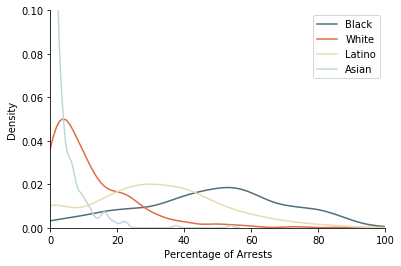

In [28]:
fig, ax = plt.subplots()
colors = ["#dd6e42","#e8dab2","#4f6d7a","#c0d6df", "#AAAE7F"]
sns.kdeplot(blck_pcts['Pct Black'], label = 'Black', ax=ax, color=colors[2]).set_xlim(0,100)
sns.kdeplot(wht_pcts['Pct White'], label = 'White', ax=ax, color=colors[0])
sns.kdeplot(his_pcts['Pct Hispanic'], label = 'Latino', ax=ax, color=colors[1])
sns.kdeplot(aapi_pcts['Pct AAPI'], label = 'Asian', ax=ax, color=colors[3]).set_ylim(0, 0.1)
ax.set_xlabel('Percentage of Arrests')
#ax.title('Racial Makeup of Arrests at Subway Stops')
ax.set_ylabel('Density')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.savefig('../figures/Race Percents KDE.png', bboxinches='tight')


In [162]:
blck_pcts

,Pct Black
34.0,42.142857
254.0,58.354026
59.0,44.768311
295.0,58.504332
206.0,47.261072
...,...
435.0,40.000000
62.0,0.000000
413.0,0.000000
339.0,0.000000


In [49]:
blck_cts = {}

for i in arrests.objectid.unique():
    try:
        blck_cts[i] = race_counts.loc[(i, 'BLACK')]
    except:
        blck_cts[i] = 0
        
blck_cts = pd.DataFrame(blck_cts).T.rename({'ARREST_KEY':'Num Black'}, axis=1)

his_cts = {}

for i in arrests.objectid.unique():
    try:
        his_cts[i] = race_counts.loc[(i, 'WHITE HISPANIC')] + race_counts.loc[(i, 'BLACK HISPANIC')]
    except:
        his_cts[i] = 0
        
his_cts = pd.DataFrame(his_cts).T.rename({'ARREST_KEY':'Num Hispanic'}, axis=1)

wht_cts = {}

for i in arrests.objectid.unique():
    try:
        wht_cts[i] = race_counts.loc[(i, 'WHITE')]
    except:
        wht_cts[i] = 0
        
wht_cts = pd.DataFrame(wht_cts).T.rename({'ARREST_KEY':'Num White'}, axis=1)

aapi_cts = {}

for i in arrests.objectid.unique():
    try:
        aapi_cts[i] = race_counts.loc[(i, 'ASIAN / PACIFIC ISLANDER')]
    except:
        aapi_cts[i] = 0
        
aapi_cts = pd.DataFrame(aapi_cts).T.rename({'ARREST_KEY':'Num AAPI'}, axis=1)

C:\Users\nicol\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Density')

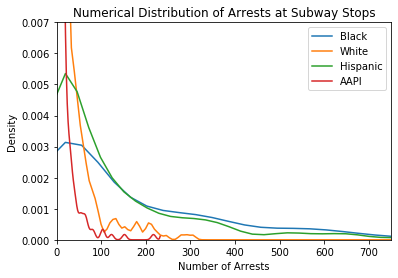

In [50]:
sns.kdeplot(blck_cts['Num Black'], label = 'Black').set_xlim(0, 750)
sns.kdeplot(wht_cts['Num White'], label = 'White')
sns.kdeplot(his_cts['Num Hispanic'], label = 'Hispanic')
sns.kdeplot(aapi_cts['Num AAPI'], label = 'AAPI', bw = 5).set_ylim(0, 0.007)
plt.xlabel('Number of Arrests')
plt.title('Numerical Distribution of Arrests at Subway Stops')
plt.ylabel('Density')

In [21]:
counts = arrests.groupby('objectid').agg({'ARREST_KEY':'count'}).rename({'ARREST_KEY':'Num Arrests'}, axis=1)

In [155]:
num_pct_blck = counts.merge(blck_pcts, left_index=True, right_index=True)

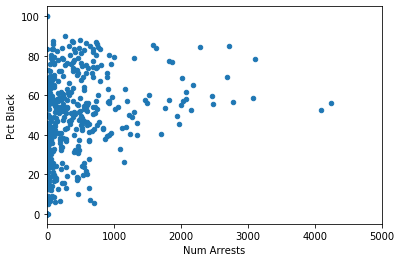

In [156]:
num_pct_blck.plot(x='Num Arrests', y='Pct Black', kind='scatter', xlim =(0, 5000))

In [157]:
num_blck_hisp = pd.DataFrame(blck_pcts['Pct Black']+his_pcts['Pct Hispanic'])
num_pct_blck_hisp = counts.merge(num_blck_hisp, left_index=True, right_index=True)

Text(0.5, 1.0, 'Racial Makeup of Arrests and Number of Arrests at a Station')

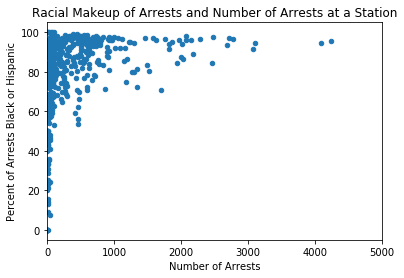

In [158]:
num_pct_blck_hisp.plot(x='Num Arrests', y=0, kind='scatter', xlim = (0, 5000))
plt.ylabel('Percent of Arrests Black or Latino')
plt.xlabel('Number of Arrests at Station')
plt.title('Racial Makeup of Arrests and Number of Arrests at a Station')


In [22]:
entries = turnstile.groupby('objectid').agg({'entries':'sum'})

In [23]:
rates = pd.DataFrame(counts['Num Arrests']*100000/entries.entries).fillna(0.0)

In [24]:
rate_pct_blck = rates.merge(blck_pcts, left_index=True, right_index=True)

Text(0.5, 0, 'Arrests per 100K Entries')

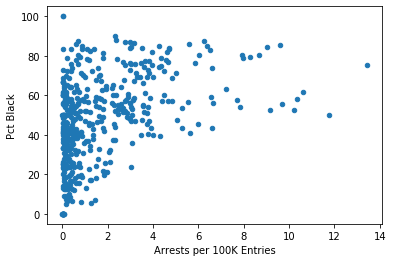

In [162]:
rate_pct_blck.plot(x=0, y='Pct Black', kind='scatter')
plt.xlabel('Arrests per 100K Entries')

In [25]:
pct_blck_hisp = pd.DataFrame(blck_pcts['Pct Black']+his_pcts['Pct Hispanic'])
rate_pct_blck_hisp = rates.merge(pct_blck_hisp, left_index=True, right_index=True)

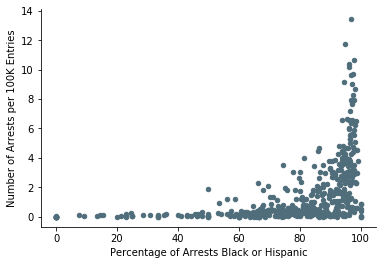

In [27]:
fig, ax = plt.subplots()
rate_pct_blck_hisp.plot(x='0_y', y='0_x', kind='scatter', ax=ax, color = "#4f6d7a")
ax.set_ylabel('Number of Arrests per 100K Entries')
ax.set_xlabel("Percentage of Arrests Black or Hispanic")
#plt.title('Racial Makeup of Arrests and Rate of Arrest at a Station')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.savefig('../figures/Arrest Demographics and arrest rate.png', bboxinches='tight')

In [169]:
rates.sort_values(0)

,0
objectid,
426.0,0.000000
413.0,0.000000
424.0,0.000000
277.0,0.000000
352.0,0.000000
...,...
27.0,10.202923
254.0,10.350512
256.0,10.633028
